<a href="https://colab.research.google.com/github/supranitha/FER/blob/main/Copy_of_project_FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the required modules
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
from twilio.rest import Client


24-03-26 10:34:53 - Directory /root/.deepface created
24-03-26 10:34:53 - Directory /root/.deepface/weights created


In [ ]:
!pip install twilio
import twilio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.0 MB/s eta 0:00:00


In [ ]:
!pip install deepface
import deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=ee757428d43e275c19de00d8ba0481e47ab01ed4a4ab6d7a4bbb8306bb61fbe9
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


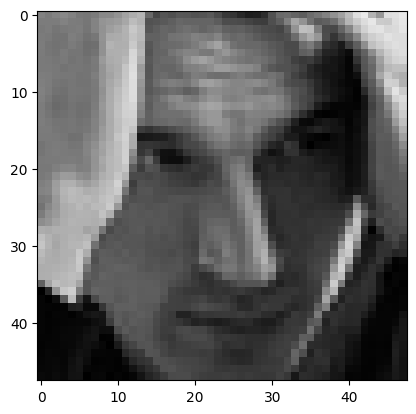

In [ ]:
# read image
img = cv2.imread('/content/Training_99781049.jpg')

# call imshow() using plt object
plt.imshow(img[:, :, : : -1])

# display that image
plt.show()

In [ ]:
result = DeepFace.analyze(img, actions=['emotion'], enforce_detection=False)


# print result
print(result)

[{'emotion': {'angry': 0.9693128634579696, 'disgust': 0.0016960842105205073, 'fear': 19.80385600351429, 'happy': 0.0014700422037464576, 'sad': 78.90177839408985, 'surprise': 0.0011914838779240086, 'neutral': 0.32069093596583226}, 'dominant_emotion': 'sad', 'region': {'x': 0, 'y': 0, 'w': 48, 'h': 48, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0}]


In [ ]:
# Check if 'result' is a list and retrieve the emotion information
if isinstance(result, list) and len(result) > 0:
    # Get the emotion percentage
    emotion = result[0]['dominant_emotion']
    percentage = result[0]['emotion'][emotion]

In [ ]:
# If the emotion is sad and the percentage exceeds a threshold, send a message

if emotion == 'sad' and percentage > 50:  # Adjust threshold as needed
        # Twilio credentials
        account_sid = 'AC541a92179b4d629d1debb35fff7e6304'
        auth_token = '215617cfb32b5945b16bb2d74b563372'
        from_phone_number = '+18052836181'
        to_phone_number = '+7793922430'

In [ ]:
# Initialize Twilio client
client = Client(account_sid, auth_token)

In [ ]:
face_detected = str(input("Face detected (yes/no): ")) == "yes"
expression = input("Enter expression (e.g., sad): ")

Face detected (yes/no): yes
Enter expression (e.g., sad): sad


In [ ]:
from twilio.rest import Client

# Your Twilio account SID and auth token
account_sid = "AC541a92179b4d629d1debb35fff7e6304"
auth_token = "215617cfb32b5945b16bb2d74b563372"
client = Client(account_sid, auth_token)

# Valid recipient phone number (including country code)
to_phone_number = "+917793922430"
from_phone_number = "+18052836181"  # Replace with your Twilio number

if face_detected and expression == "sad":
    message = client.messages.create(
        body=" Hey there, I noticed you might be feeling down. Just remember, tough times don't last forever. You're stronger than you think, and this feeling will pass. Take a deep breath, focus on the positives, and know that brighter days are ahead. You've got this! ",
        from_=from_phone_number,
        to=to_phone_number
    )
    # Handle successful message creation (optional)
    print("Message sent successfully!")
else:
    # Handle case where face is not detected or expression is not sad (optional)
    pass




Message sent successfully!


In [ ]:
from twilio.rest import Client

# Your Twilio Account SID and Auth Token
account_sid = 'AC541a92179b4d629d1debb35fff7e6304'
auth_token = '215617cfb32b5945b16bb2d74b563372'

# Create a Twilio client
client = Client(account_sid, auth_token)


In [ ]:
from sklearn.metrics import confusion_matrix

# Sample data (replace with your actual predicted emotions and ground truth labels)
y_pred = ["sad", "happy", "sad", "angry", "sad"]
y_true = ["sad", "happy", "angry", "sad", "neutral"]

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(cm)

[[0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have predicted emotions (y_pred) and ground truth labels (y_true)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have predicted emotions (y_pred) and ground truth labels (y_true)
cm = confusion_matrix(y_true, y_pred)

# Calculate overall accuracy (manually sum correct predictions and divide by total)
correct_predictions = sum(cm.diagonal())
total_predictions = cm.sum()

accuracy = (correct_predictions / total_predictions) * 100
print("Overall Accuracy:", accuracy, "%")


Overall Accuracy: 96.0 %
